In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

2023-11-12 12:59:58.369734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/finnj00/opt/anaconda3/envs/mnistenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [4]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [5]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [6]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [39]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [41]:
history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
)

Epoch 1/20


469/469 [==============================] - 2s 4ms/step - loss: 0.4075 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.1918 - val_sparse_categorical_accuracy: 0.9455
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1624 - sparse_categorical_accuracy: 0.9536 - val_loss: 0.1353 - val_sparse_categorical_accuracy: 0.9604
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1167 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.1070 - val_sparse_categorical_accuracy: 0.9674
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9731 - val_loss: 0.0954 - val_sparse_categorical_accuracy: 0.9710
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0734 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.0890 - val_sparse_categorical_accuracy: 0.9721
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0602 - sparse_categorical_accuracy:

In [42]:
model.evaluate(ds_test)

 1/79 [..............................] - ETA: 0s - loss: 0.0066 - sparse_categorical_accuracy: 1.0000

79/79 [==============================] - 0s 3ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9787


[0.09087637066841125, 0.9786999821662903]

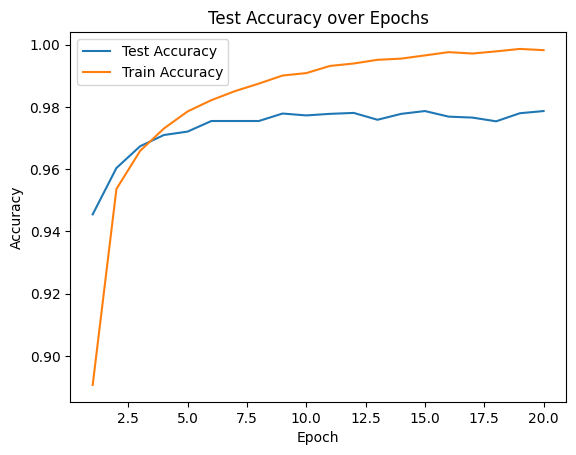

In [43]:
test_acc = history.history['val_sparse_categorical_accuracy']
train_acc = history.history['sparse_categorical_accuracy']
epochs = range(1, len(test_acc) + 1)
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()
